In [188]:
import sys
sys.path.append('..')
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from nt_toolbox.signal import gaussian_blur, imageplot, load_image
from nt_toolbox.perform_blurring import perform_blurring
from nt_toolbox.general import rescale
from plotting_tools import cplot
from numeric_tools import compute_gradient, planar_curve, resample
from active_contours import perform_gradient_descent_standard_curve, perform_gradient_descent_polar_curve
from skimage import transform
from nt_toolbox.perform_redistancing import *
import scipy


<IPython.core.display.Javascript object>


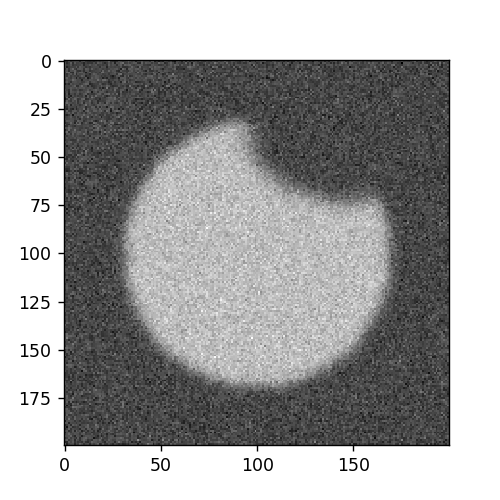

In [41]:
n=200
sigma = 0.1
f0 = load_image('data/disk_biz.bmp', resc=1)
f0 = transform.resize(f0/765, [n, n], 1)
W = gaussian_blur(f0,3.0)
W = rescale( np.minimum(W,.05), .3,1)
plt.figure(figsize=(4,4))
noise = np.random.normal(0, sigma, n*n).reshape(n,n )
W = W + noise
imageplot(W)


<IPython.core.display.Javascript object>


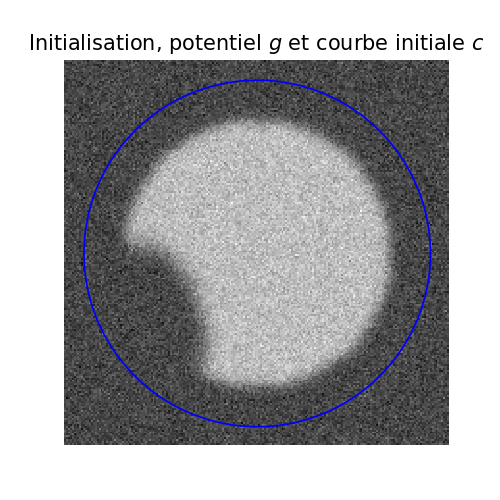

In [42]:
r = 0.9*n/2 # radius
p = 128 # number of points on the curve
theta = np.transpose(np.linspace(0, 2*np.pi, p + 1) )
theta = theta[0:-1]
c_0 = n/2 * (1 + 1j) +  r*(np.cos(theta) + 1j*np.sin(theta))

plt.figure(figsize=(4,4))
plt.title(r"Initialisation, potentiel $g$ et courbe initiale $c$")
imageplot(np.transpose(W))
cplot(c_0)
plt.savefig('results/init.eps')

<IPython.core.display.Javascript object>


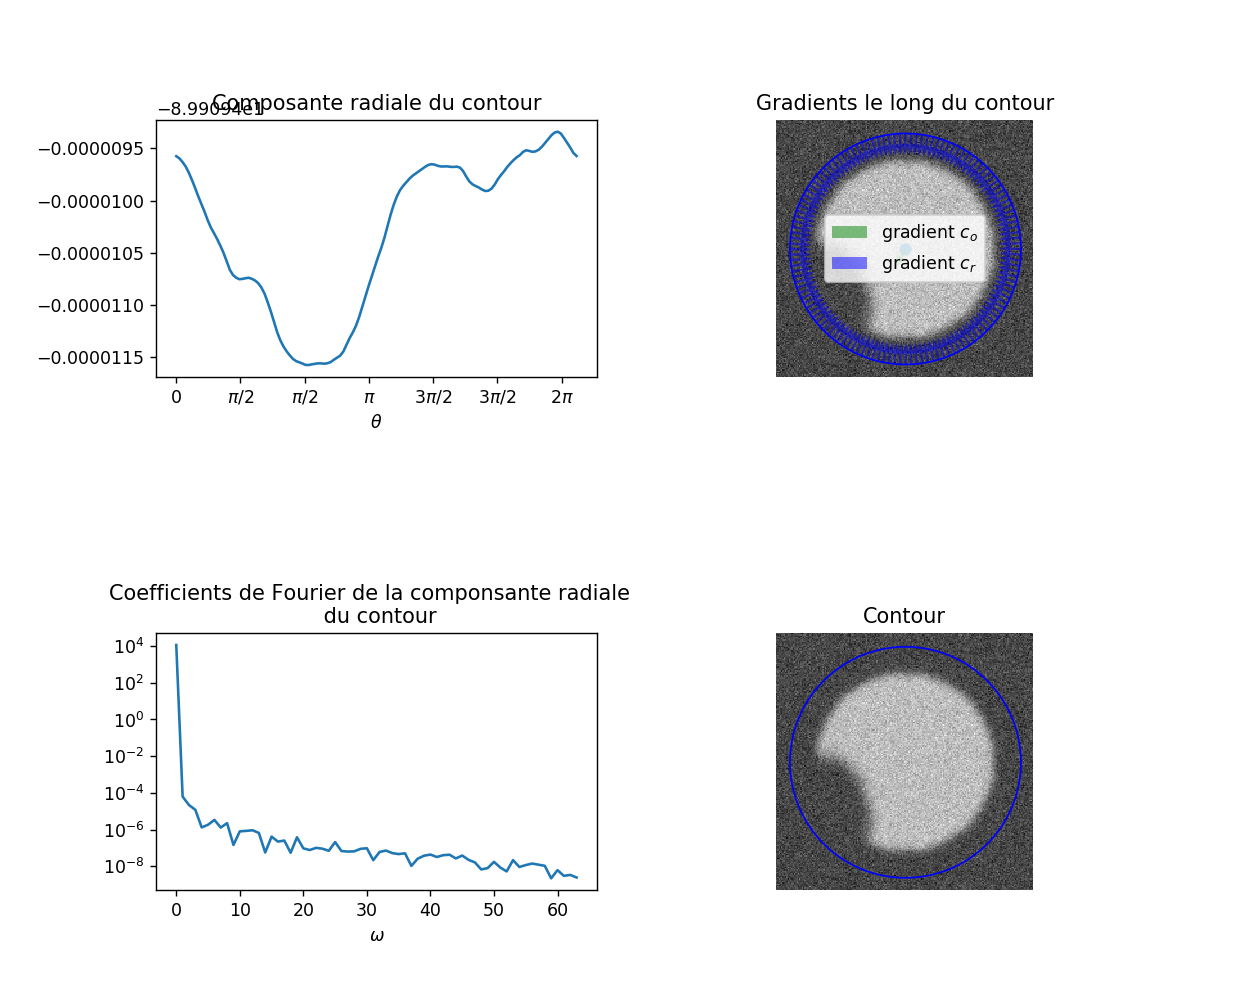

In [44]:
c_0 = n/2 * (1 + 1j)
c_r = [0.9*n/2]*128

c_0, c_r = perform_gradient_descent_polar_curve(W,
                                                c_0,
                                                 c_r,
                                                 dt=1,
                                                 niter=1,
                                                 nb_points_c=128,
                                                 sobolev=True,
                                                 lam=1,
                                                 gamma=100,
                                                 region_term=W,
                                                 c1=1,
                                                 c2=0,
                                                 step_display=1000,
                                                 save='results/gamma100__init'
                                                 )


<IPython.core.display.Javascript object>


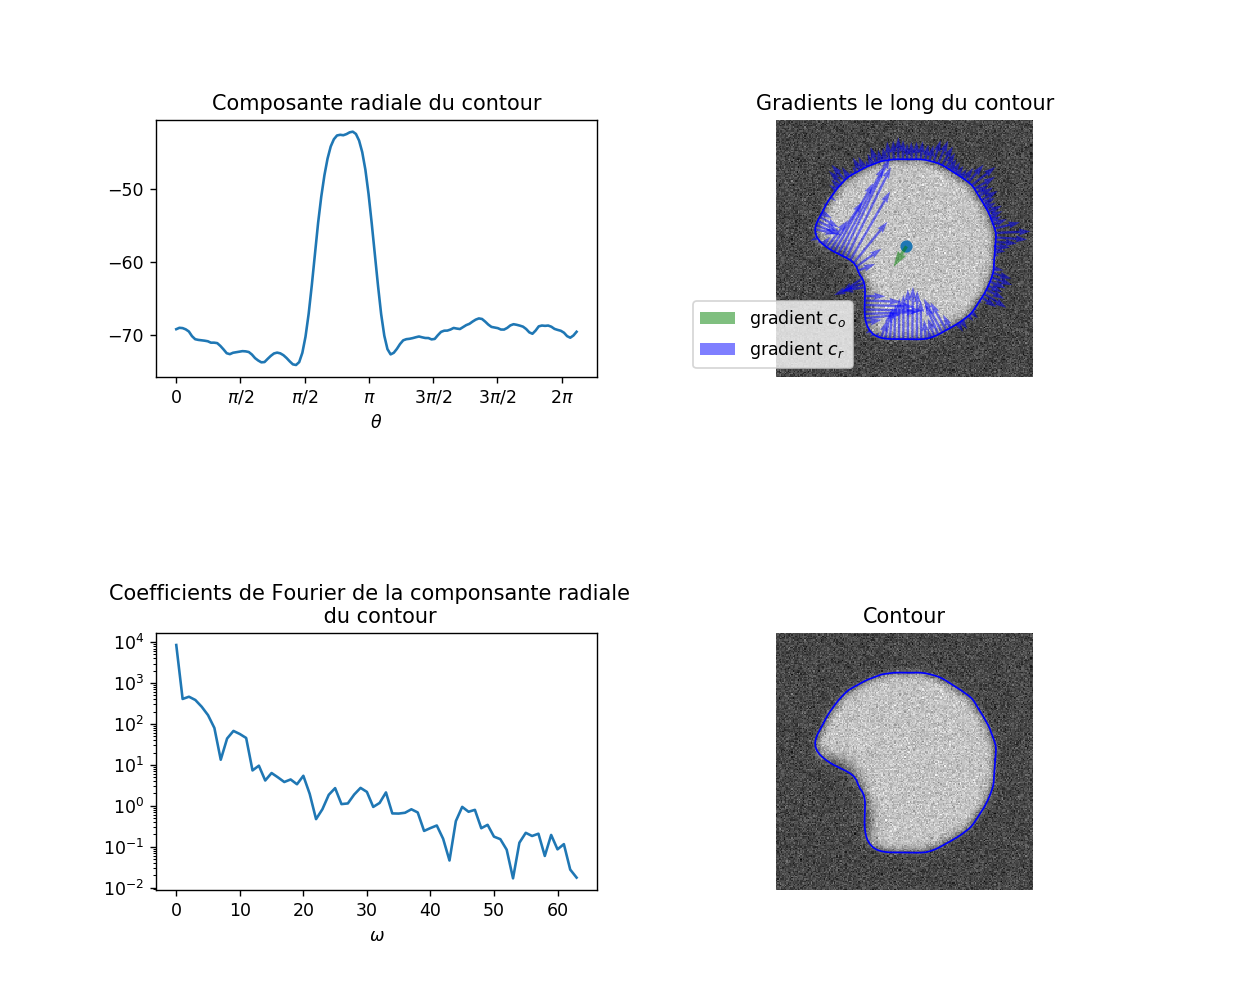

In [28]:
c_0 = n/2 * (1 + 1j)
c_r = [0.9*n/2]*128

c_0, c_r = perform_gradient_descent_polar_curve(W,
                                                c_0,
                                                 c_r,
                                                 dt=1,
                                                 niter=10000,
                                                 nb_points_c=128,
                                                 sobolev=True,
                                                 lam=1,
                                                 gamma=0.042,
                                                 region_term=W,
                                                 c1=1,
                                                 c2=0,
                                                 step_display=1000,
                                                 save='region_0.042'
                                                 )


<IPython.core.display.Javascript object>


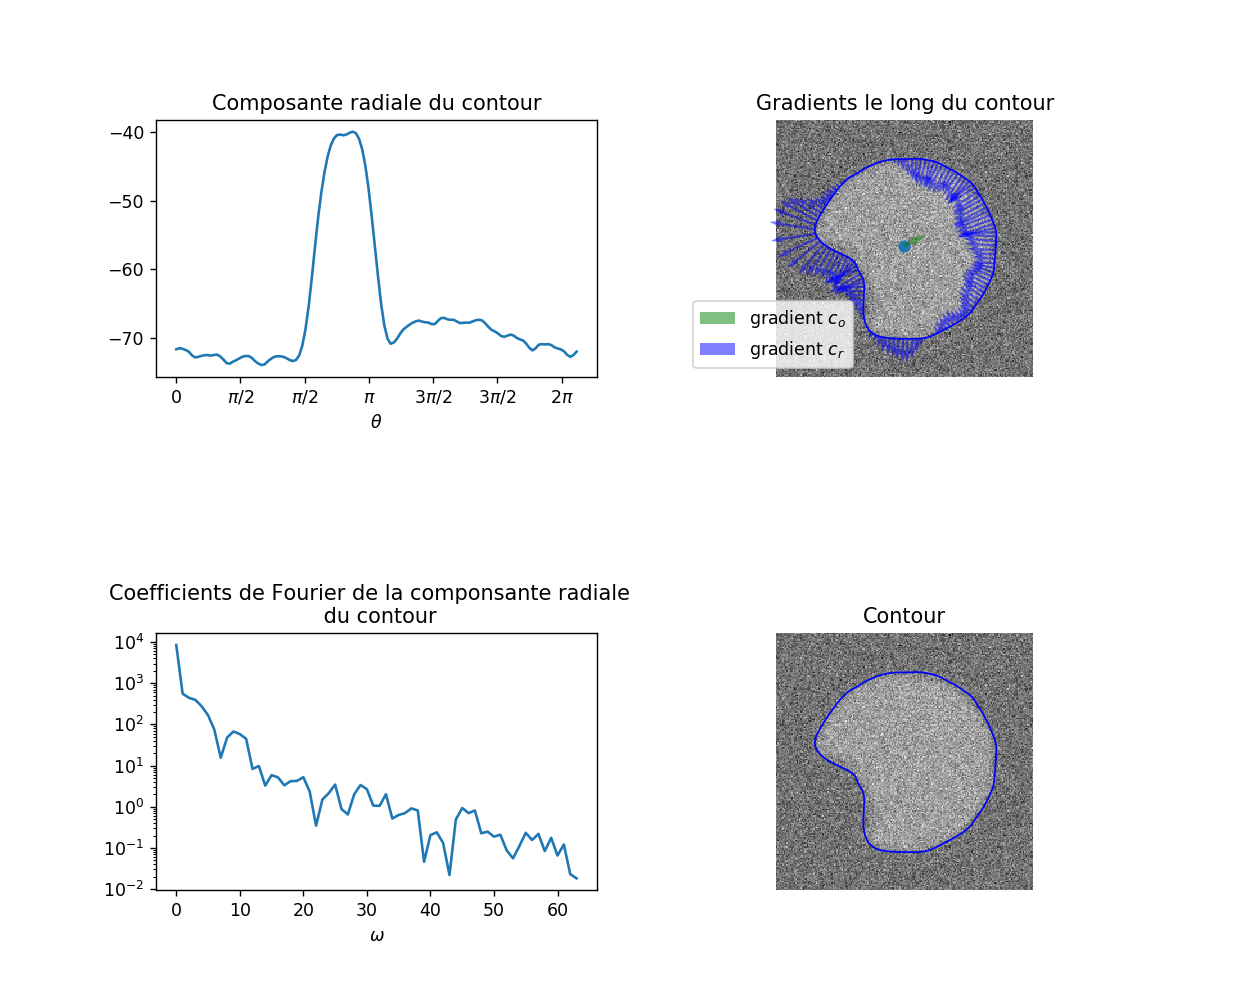

In [39]:
c_0 = n/2 * (2/3 + 1j)
c_0_1, c_r_1 = perform_gradient_descent_polar_curve(W,
                                                c_0,
                                                 c_r,
                                                 dt=1,
                                                 niter=1000,
                                                 nb_points_c=128,
                                                 sobolev=True,
                                                 lam=0.6,
                                                 gamma=0.2,
                                                 region_term=W,
                                                 c1=1,
                                                 c2=0,
                                                 step_display=1000
                                                 )
